In [1]:
import pandas as pd

df = pd.read_csv("../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Logistic Regresion Model

   Corr Threshold   N                                           Features
0             0.2   6  [BMI, Smoking, AlcoholDrinking, Sex, SleepTime...
1             0.3  11  [BMI, Smoking, AlcoholDrinking, Stroke, Physic...
2             0.4  13  [BMI, Smoking, AlcoholDrinking, Stroke, Physic...
3             0.5  15  [BMI, Smoking, AlcoholDrinking, Stroke, Physic...
4             0.6  16  [BMI, Smoking, AlcoholDrinking, Stroke, Physic...


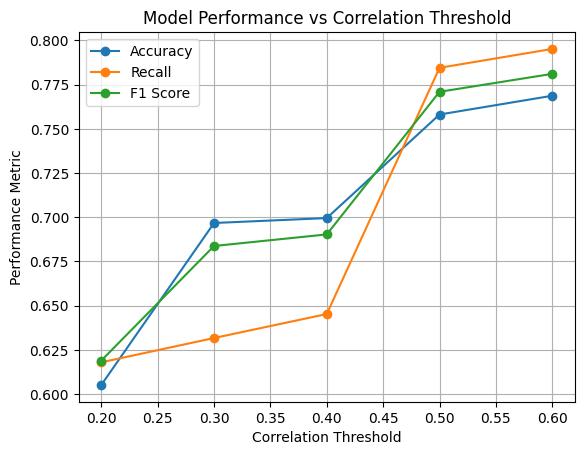

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("../../../data/preprocessed_data.csv")
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Define the range of correlation thresholds you want to try
correlation_thresholds_to_try = [0.2, 0.3, 0.4, 0.5, 0.6]

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
selected_features_list = []

for threshold in correlation_thresholds_to_try:
    # Select features based on correlation
    correlated_features = set()
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    x_selected = x.drop(columns=correlated_features)

    # Store the selected features
    selected_features_list.append(x_selected.columns.tolist())

    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

    # Logistic Regression model
    modelLogistic = LogisticRegression(max_iter=500)
    modelLogistic.fit(x_train, y_train)

    # Make predictions for the test data
    y_pred = modelLogistic.predict(x_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Corr Threshold': correlation_thresholds_to_try,
    'N': [len(features) for features in selected_features_list],
    'Features': selected_features_list,
})

# Display the DataFrame
print(results_df)

# Plot the results
plt.plot(correlation_thresholds_to_try, accuracy_scores, marker='o', label='Accuracy')
plt.plot(correlation_thresholds_to_try, recall_scores, marker='o', label='Recall')
plt.plot(correlation_thresholds_to_try, f1_scores, marker='o', label='F1 Score')

plt.title('Model Performance vs Correlation Threshold')
plt.xlabel('Correlation Threshold')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()
